# What is torchvision?

Torchvision is a package belong to Pytorch, used to construct computer vision model.  

Document: [https://pytorch.org/vision/0.9/transforms.html](https://pytorch.org/vision/0.9/transforms.html)  

(1) torchvision.datasets: some built-in datasets provided  
(2) torchvision.models: some pretrained model(like ResNet, DenseNet...)  
(3) torchvision.transforms: some transform of image  
(4) torchvision.utils: some extension function(like saving image, draw bounding boxes...)

# Import Pytorch and set random seed

In [1]:
import torch

torch.manual_seed(17)

# Load an image

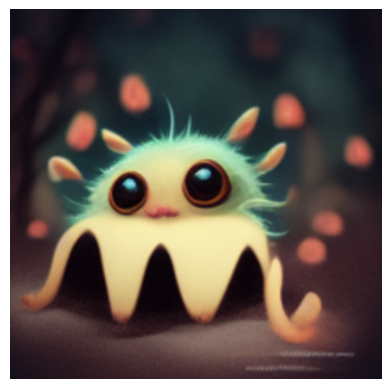

size of img: (438, 436)


In [2]:
from PIL import Image
import matplotlib.pyplot as plt

def display_image(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()

img = Image.open("image.png")
display_image(img)
print(f"size of img: {img.size}")

# CenterCrop

**Crops the given image at the center by the given size.**

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) size(sequence or int): the output image's size

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: Cropped image  
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor

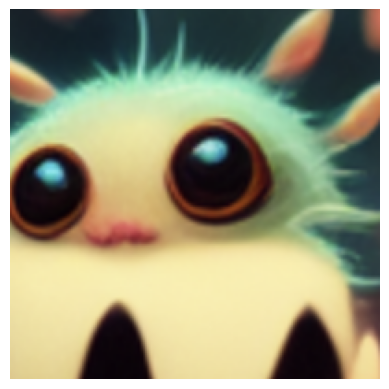

In [3]:
import torchvision

image = img.copy()

new_image = torchvision.transforms.CenterCrop((200, 200))(image)
display_image(new_image)

# ColorJitter

**Radomly change the brightnes, constrast, saturation and hue of an image.**  

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) brightness(float or float(min, max)): brightness factor will be chosen randomly between [max(0, 1 - brightness), 1 + brightness] or given [min, max].  
&ensp;&ensp;&ensp;&ensp;(2) contrast(float or float(min, max)): contrast factor will ne chosen randomly between [max(0, 1 - contrast), 1 + contrast] or the given [min, max].  
&ensp;&ensp;&ensp;&ensp;(3) saturation(float or float(min, max)): saturation factor will be chosen randomly between [max(0, 1 - saturation), 1 + saturation] or the given [min, max].  
&ensp;&ensp;&ensp;&ensp;(4) hue(float or float(min, max)): hue factor will be chosen randomly between [-hue, hue] or the given [min, max]. The range of hue should be 0 <= hue <= 0.5 or -0.5 <= min <= max <= 0.5.  

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: Color jittered image  
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor

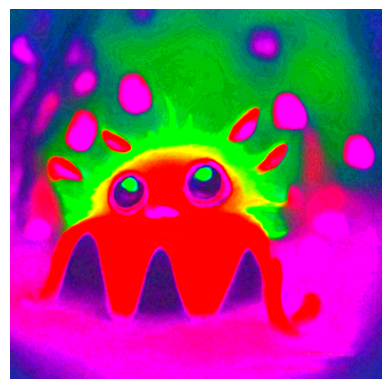

In [4]:
image = img.copy()

new_image = torchvision.transforms.ColorJitter(10, 20, 30, 0.5)(image)
display_image(new_image)

# FiveCrop

**Crop the given image into four corners and the central crop.**  

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) size(sequence or int): the output image's size  

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: cropped image of four corners and central  
&ensp;&ensp;&ensp;&ensp;return type: tuple of five PIL Image or Tensor

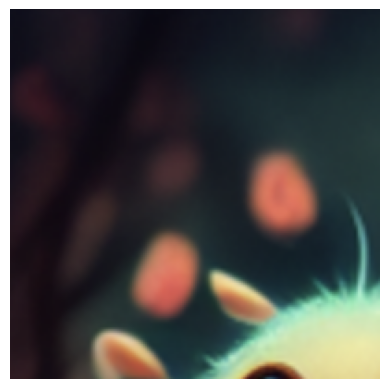

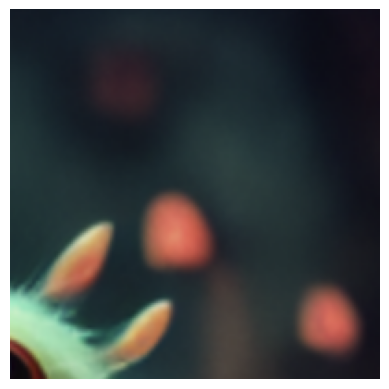

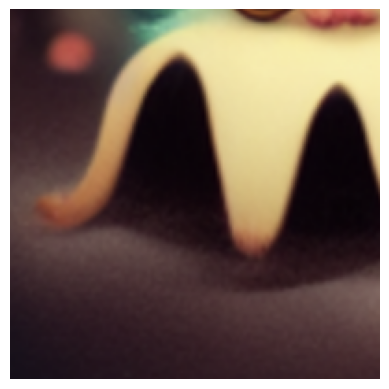

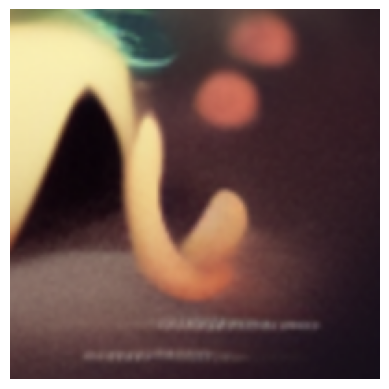

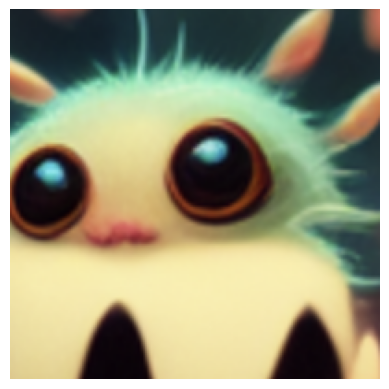

In [5]:
image = img.copy()

new_image = torchvision.transforms.FiveCrop((200, 200))(image)
for i in new_image:
    display_image(i)

# TenCrop

**Crop the given image into four corners and central copr + flipped version**

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) size(sequence or int): desired output size  
&ensp;&ensp;&ensp;&ensp;(2) vertical_flip(boolean): use vertical flip instead of horizontal flip  

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: ten cropped image  
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor

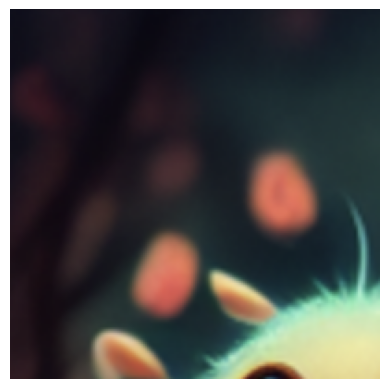

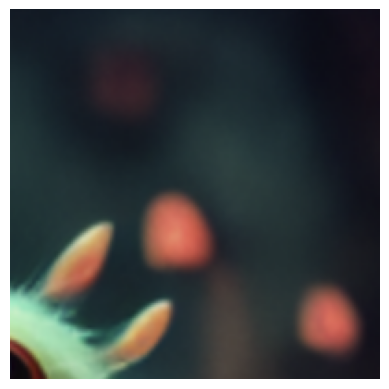

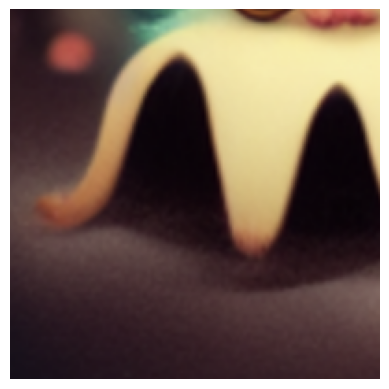

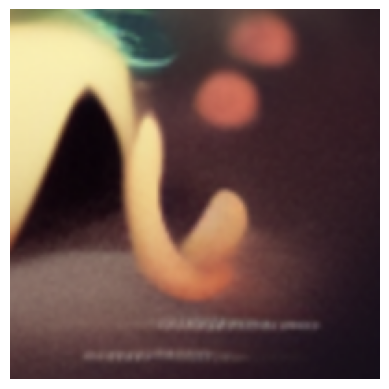

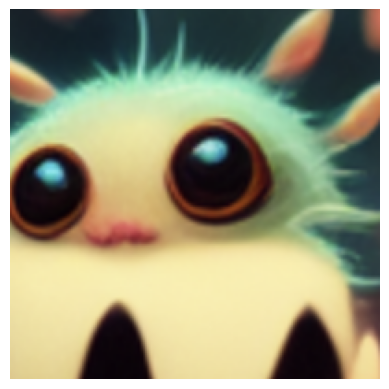

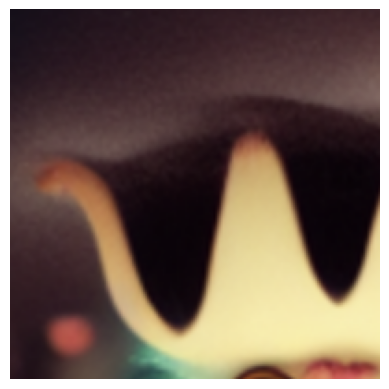

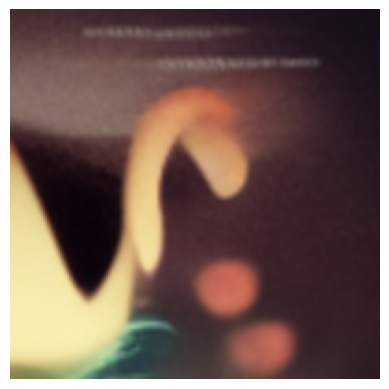

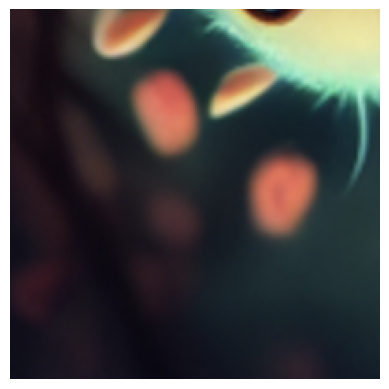

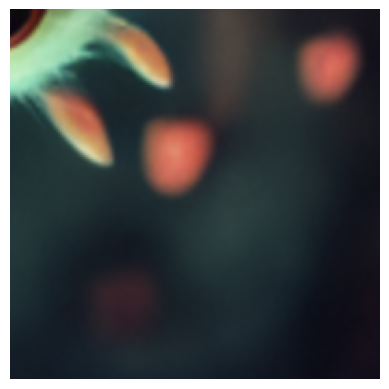

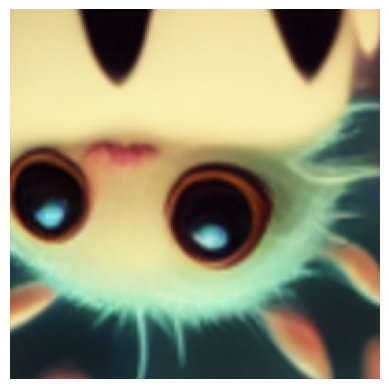

In [6]:
image = img.copy()

new_image = torchvision.transforms.TenCrop(size = (200, 200), vertical_flip = True)(image)
for i in new_image:
    display_image(i)

# Grayscale

**Convert the image into grayscale.**  

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) num_output_channels(int)(1 or 3): the number of output image's channels  

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: grayscaled image  
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor

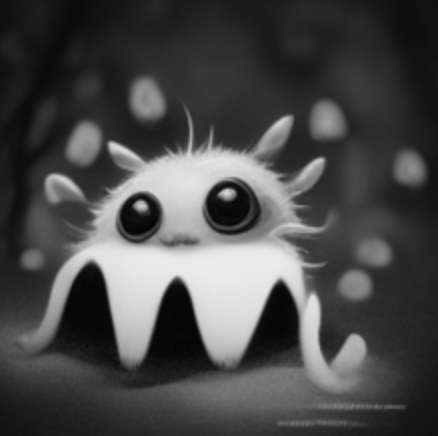

mode of new_image_single_channel: L


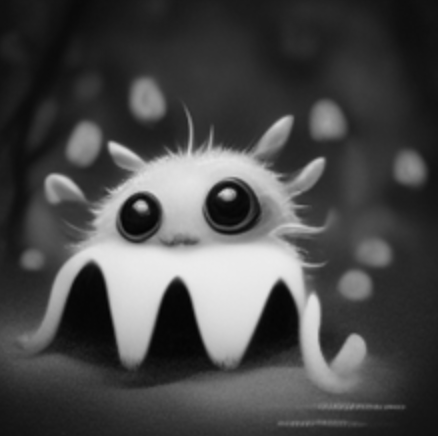

mode of new_image_three_channel: RGB


In [7]:
image = img.copy()

new_image_single_channel = torchvision.transforms.Grayscale(1)(image)
display(new_image_single_channel)
print(f"mode of new_image_single_channel: {new_image_single_channel.mode}")

new_image_three_channel = torchvision.transforms.Grayscale(3)(image)
display(new_image_three_channel)
print(f"mode of new_image_three_channel: {new_image_three_channel.mode}")

# RandomGrayscale

**Radomly convert image to grayscale with a probability.**

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) p(float): the probability that image should be converted to grayscale    

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: grayscaled image  
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor

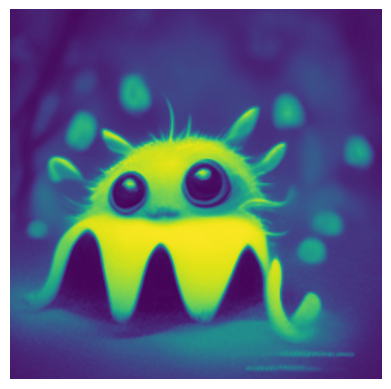

In [8]:
image = img.copy()
image = image.convert("L")

new_image = torchvision.transforms.RandomGrayscale(p = 0.5)(image)
display_image(new_image)

# Pad

**Pad the given image on all sides with given pad.**  

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) padding(sequence or int):  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;1. integer: length of padding for four sides  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;2. a sequence of length 2: padding[0] for left and right; padding[1] for top and bottom  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;3. a sequence of length 4: padding[0] for left; padding[1] for top; padding[2] for right; padding[3] for bottom  
&ensp;&ensp;&ensp;&ensp;(2) fill(sequence): represent r, g, b, a of the padding when padding_mode is setted "constant"  
&ensp;&ensp;&ensp;&ensp;(3) padding_mode("constant", "edge", "reflect" or "symmetric"):  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;1. constant: use fill as padding color  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;2. edge: use last value of the edge as padding color  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;3. reflect: reflect the value of the edge as padding color  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;ex: [<span style="color:blue">1</span>, <span style="color:blue">2</span>, <span style="color:blue">3</span>, <span style="color:blue">4</span>] -> [<span style="color:red">3</span>, <span style="color:red">2</span>, <span style="color:blue">1</span>, <span style="color:blue">2</span>, <span style="color:blue">3</span>, <span style="color:blue">4</span>, <span style="color:red">3</span>, <span style="color:red">2</span>]  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;4. symmetric: symmetric the value of the image as padding color  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;ex: [<span style="color:blue">1</span>, <span style="color:blue">2</span>, <span style="color:blue">3</span>, <span style="color:blue">4</span>] -> [<span style="color:red">2</span>, <span style="color:red">1</span>, <span style="color:blue">1</span>, <span style="color:blue">2</span>, <span style="color:blue">3</span>, <span style="color:blue">4</span>, <span style="color:red">4</span>, <span style="color:red">3</span>]  

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: padded image  
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor

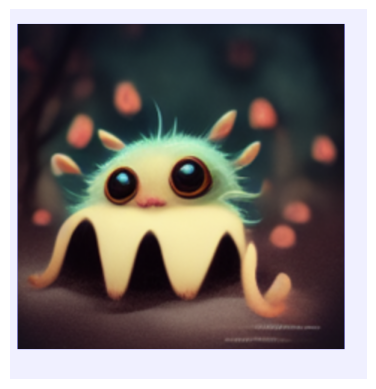

In [9]:
image = img.copy()

new_image = torchvision.transforms.Pad(padding = (10, 20, 30, 40), fill = (0, 0, 255, 15), padding_mode = "constant")(image)
display_image(new_image)

# RandomAffine

**Random affine transformation of given image keeping center invariant.**  

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) degrees(sequence or int): If degree is an integer, then the range will be (-degree, degree); if degree is a sequence, then the range will be (min, max).  
&ensp;&ensp;&ensp;&ensp;(2) translate(tuple): a pair of float number to shift image  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;ex: translate = (a, b)  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&nbsp;horizontal shift range = (-img_width * a, img_height * a)  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&nbsp;vertical shift range = (-img_height * b, img_height * b)  
&ensp;&ensp;&ensp;&ensp;(3) scale(tuple): the range of scale factor  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;ex: (a, b) -> image size multiply a number between a to b  
&ensp;&ensp;&ensp;&ensp;(4) shear(sequence or number):  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;1. If shear is a number, a shear will be applied on x-axis in the range (-shear, shear).  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;2. If shear is a sequence with length of 2, a shear will be applied on x-axis in the range (shear[0], shear[1]).  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;3. If shear is a sequence with length of 4, a shear will be applied on x-axis in the range(shear[0], shear[1]), and another shear will be applied on y-axis in the range(shear[2], shear[3]).  
&ensp;&ensp;&ensp;&ensp;(5) interpolation(InterpolationMode):   
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;1. InterpolationMode.NEAREST  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;2. InterpolationMode.BILINEAR  
&ensp;&ensp;&ensp;&ensp;(6) fill(sequence or number): the color of the area outside the transformed image  

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: affine transformed image  
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor

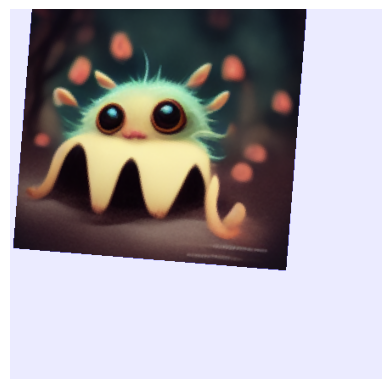

In [10]:
image = img.copy()

new_image = torchvision.transforms.RandomAffine((0, 10), translate = (0.1, 0.2), scale = (0.7, 0.8), shear = 0.3, fill = (0, 0, 255, 20))(image)
display_image(new_image)

# RandomCrop

**Crop image at random location.**  

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) size(sequecne or int): the output image's size  
&ensp;&ensp;&ensp;&ensp;(2) padding(sequence or int):  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;1. integer: length of padding for four sides  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;2. a sequence of length 2: padding[0] for left and right; padding[1] for top and bottom  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;3. a sequence of length 4: padding[0] for left; padding[1] for top; padding[2] for right; padding[3] for bottom  
&ensp;&ensp;&ensp;&ensp;(3) pad_if_needed(boolean): pad the image if it's smaller then the desired size  
&ensp;&ensp;&ensp;&ensp;(4) fill(sequence): represent r, g, b, a of the padding when padding_mode is setted "constant"  
&ensp;&ensp;&ensp;&ensp;(5) padding_mode("constant", "edge", "reflect" or "symmetric"):  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;1. constant: use fill as padding color  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;2. edge: use last value of the edge as padding color  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;3. reflect: reflect the value of the edge as padding color  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;ex: [<span style="color:blue">1</span>, <span style="color:blue">2</span>, <span style="color:blue">3</span>, <span style="color:blue">4</span>] -> [<span style="color:red">3</span>, <span style="color:red">2</span>, <span style="color:blue">1</span>, <span style="color:blue">2</span>, <span style="color:blue">3</span>, <span style="color:blue">4</span>, <span style="color:red">3</span>, <span style="color:red">2</span>]  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;4. symmetric: symmetric the value of the image as padding color  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;ex: [<span style="color:blue">1</span>, <span style="color:blue">2</span>, <span style="color:blue">3</span>, <span style="color:blue">4</span>] -> [<span style="color:red">2</span>, <span style="color:red">1</span>, <span style="color:blue">1</span>, <span style="color:blue">2</span>, <span style="color:blue">3</span>, <span style="color:blue">4</span>, <span style="color:red">4</span>, <span style="color:red">3</span>]  

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: cropped image  
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor  

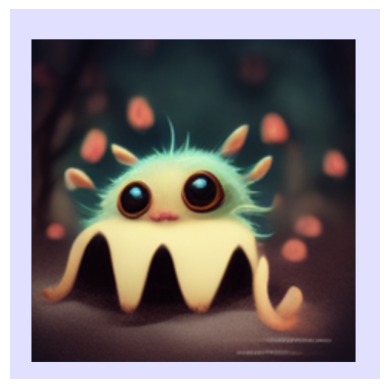

In [11]:
image = img.copy()

new_image = torchvision.transforms.RandomCrop((500, 500), padding = 50, pad_if_needed = True, fill = (0, 0, 255, 30), padding_mode = "constant")(image)
display_image(new_image)

# RandomResizedCrop

**Crop the given image into random size.**  

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) size(sequence or int): expected output size  
&ensp;&ensp;&ensp;&ensp;(2) scale(tuple(float)): scale range of the result  
&ensp;&ensp;&ensp;&ensp;(3) ratio(tuple(float)): aspect ratio range of result  
&ensp;&ensp;&ensp;&ensp;(4) interpolation(InterpolationMode):  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;1. InterpolationMode.BILINEAR  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;2. InterpolationMode.NEAREST  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;3. InterpolationMode.BICUBIC  

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: cropped and resized image  
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor  

Function:  
&ensp;&ensp;&ensp;&ensp;(1) get_params(img, scale: List[float], ratio: List[float]): give the parmas of the cropped image

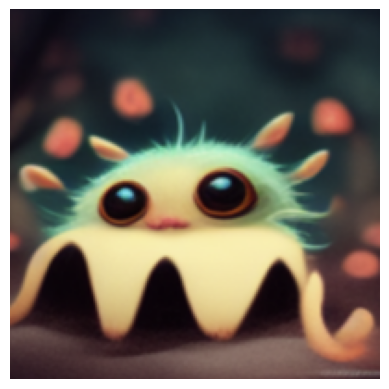

In [12]:
image = img.copy()

new_image = torchvision.transforms.RandomResizedCrop((200, 200), scale = (0.7, 0.9), ratio = (0.7, 0.9))(image)
display_image(new_image)

In [13]:
transform = torchvision.transforms.RandomResizedCrop((200, 200))
transform.get_params(image, (0.7, 0.9), (0.7, 0.9))

(7, 44, 423, 325)

# RandomHorizontalFlip

**Horizontally flip the given image randomly with given probability.**  

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) p(float): probability of the image being flipped   

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: flipped image  
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor

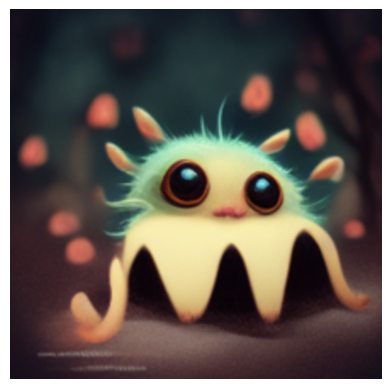

In [14]:
image = img.copy()

new_image = torchvision.transforms.RandomHorizontalFlip(p = 1)(image)
display_image(new_image)

# RandomVerticalFlip

**Vertically flip the given image randomly with given probability.**  

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) p(float): probability of flipping  

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: flipped image  
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor

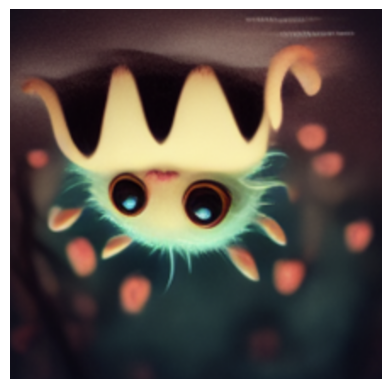

In [15]:
image = img.copy()

new_image = torchvision.transforms.RandomVerticalFlip(1)(image)
display_image(new_image)

# RandomPerspective

**Perform a random perspective transformation on the given image with given probability.**  

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) distortion_scale(float): degree of distortion  
&ensp;&ensp;&ensp;&ensp;(2) p(float): probability to transform  
&ensp;&ensp;&ensp;&ensp;(3) interpolation(InterpolationMode):   
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;1. InterpolationMode.BILINEAR  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;2. InterpolationMode.NEAREST  
&ensp;&ensp;&ensp;&ensp;(4) fill(sequence or number): pixel fill value for the area outside the transformed image  

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: randomly transformed image  
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor

Function:  
&ensp;&ensp;&ensp;&ensp;(1) get_params(width: int, height: int, distortion_scale: float): give the initial coordinate and coordinate after transformed according to the given parameters  

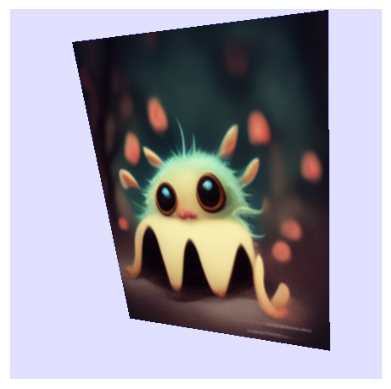

In [16]:
image = img.copy()

new_image = torchvision.transforms.RandomPerspective(distortion_scale = 0.7, p = 1, fill = (0, 0, 255, 30))(image)
display_image(new_image)

In [17]:
transform = torchvision.transforms.RandomPerspective(distortion_scale = 0.7, p = 1, fill = (0, 0, 255, 30))
transform.get_params(200, 200, 0.7)

([[0, 0], [199, 0], [199, 199], [0, 199]],
 [[53, 60], [170, 33], [131, 183], [55, 132]])

# RandomRotation

**Rotate the image by angle.**

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) degrees(sequence or number): range of degree to select from  
&ensp;&ensp;&ensp;&ensp;(2) interpolation(InterpolationMode):   
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;1. InterpolationMode.NEAREST  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;2. InterpolationMode.BILINEAR  
&ensp;&ensp;&ensp;&ensp;(3) expand(boolean): optional expansion flag  
&ensp;&ensp;&ensp;&ensp;(4) center(sequence): optional center of rotation  
&ensp;&ensp;&ensp;&ensp;(5) fill(sequence or number): pixel fill value for the area outside the rotated image    

Returns:  
&ensp;&ensp;&ensp;&ensp;(1) returns: rotated image  
&ensp;&ensp;&ensp;&ensp;(2) return type: PIL Image or Tensor  

Function:  
&ensp;&ensp;&ensp;&ensp;(1) get_params(degrees: List[float]): return angle parameter to rotate  

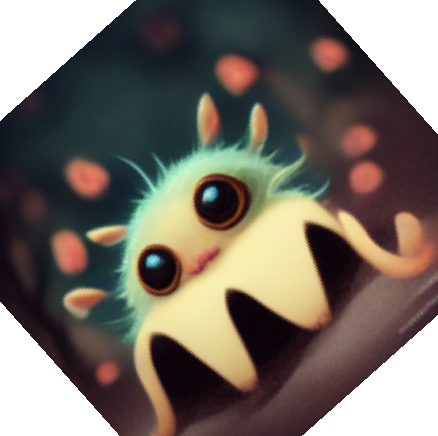

In [18]:
image = img.copy()

new_image = torchvision.transforms.RandomRotation(degrees = (30, 60))(image)
display(new_image)

In [19]:
transform = torchvision.transforms.RandomRotation(degrees = (30, 60))
transform.get_params(degrees = (70, 90))

87.86088562011719

# Resize

**Resize the given image by the given size.**

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) size(sequence or int): desired output size  
&ensp;&ensp;&ensp;&ensp;(2) interpolation(InterpolationMode):  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;1. InterpolationMode.BILINEAR  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;2. InterpolationMode.NEAREST  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;3. InterpolationMode.BICUBIC  

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: resized image  
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor

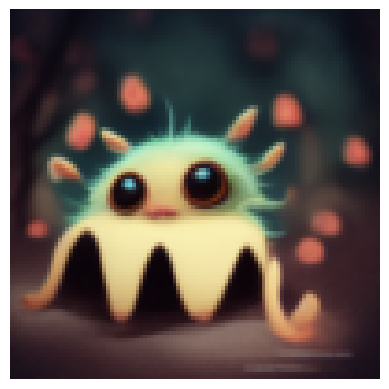

In [20]:
image = img.copy()

new_image = torchvision.transforms.Resize((100, 100))(image)
display_image(new_image)

# GaussianBlur

**Blur the image with randomly chosen Gaussian blur.**

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) kernel_size(sequence or int): size of Gaussian kernel  
&ensp;&ensp;&ensp;&ensp;(2) sigma(float or tuple(float)): standard deviation to be used for creating kernel to perform blurring  

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: Gaussian blurred image    
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor  

Function:  
&ensp;&ensp;&ensp;&ensp;(1) get_params(sigma_min: float, sigma_max: float): return sigma for Gaussian blurring

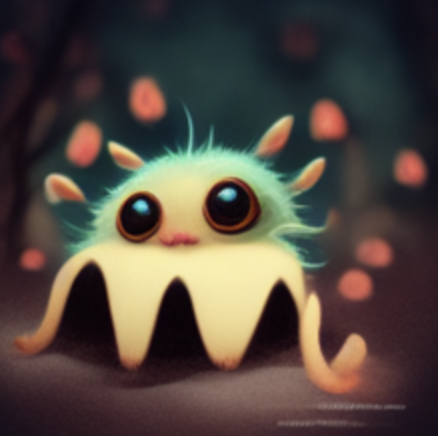

In [21]:
image = img.copy()

new_image = torchvision.transforms.GaussianBlur((15, 15), 0.5)(image)
display(new_image)

In [22]:
transform = torchvision.transforms.GaussianBlur((15, 15), 0.5)
transform.get_params(0.3, 0.7)

0.3891668915748596

# RandomApply

**Apply randomly a list of transformations with a given probability.**  

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) transforms(sequence or torch.nn.Module): list of transformation  
&ensp;&ensp;&ensp;&ensp;(2) p(float): probalbility  

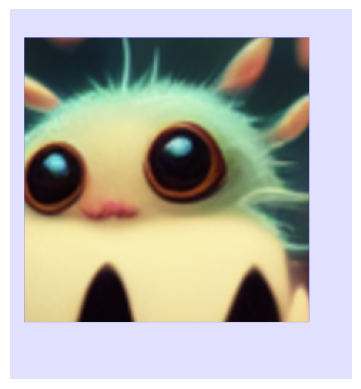

In [23]:
image = img.copy()

new_image = torchvision.transforms.RandomApply([torchvision.transforms.CenterCrop((200, 200)), 
                                               torchvision.transforms.Pad((10, 20, 30, 40), fill = (0, 0, 255, 30))])(image)
display_image(new_image)

# Compose

**Composes several transforms together.**  

Parameters:  
&ensp;&ensp;&ensp;&ensp;(1) transforms(list[transforms]): list of transforms  

Returns:  
&ensp;&ensp;&ensp;&ensp;returns: transformed image  
&ensp;&ensp;&ensp;&ensp;return type: PIL Image or Tensor

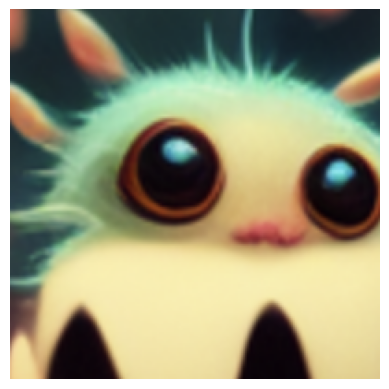

In [24]:
image = img.copy()

new_image = torchvision.transforms.Compose([torchvision.transforms.CenterCrop(200),
                               torchvision.transforms.RandomHorizontalFlip(p = 1)])(image)
display_image(new_image)